#Notebook 4: Multivariate Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
n = 500

In [ ]:
# Datos sintéticos
MedInc = np.random.lognormal(mean=2.5, sigma=0.35, size=n)
HouseAge = np.random.randint(1, 52, size=n)
Longitude = -124 + np.random.rand(n) * 10
Latitude = 32 + np.random.rand(n) * 8
AveRooms = 5 + 0.15*MedInc + 0.03*HouseAge + np.random.randn(n)

# Target
target = (
    0.45*MedInc
    - 0.02*HouseAge
    - 0.3*(Latitude-36)
    - 0.1*(Longitude+119)
    + 0.2*AveRooms
    + np.random.randn(n) * 0.5
)

df = pd.DataFrame(
    {
        "MedInc": MedInc,
        "HouseAge": HouseAge,
        "Longitude": Longitude,
        "Latitude": Latitude,
        "AveRooms": AveRooms,
        "target": target
    }
)

numeric_cols = df.columns.tolist()

In [ ]:
cov_mat = df[numeric_cols].cov()
corr_mat = df[numeric_cols].corr()

print("Covariance Matrix:\n", cov_mat.round(3), "\n")
print("Correlation Matrix:\n", corr_mat.round(3))

Covariance Matrix:
            MedInc  HouseAge  Longitude  Latitude  AveRooms  target
MedInc     22.967    -3.196      0.114     0.694     3.275  10.829
HouseAge   -3.196   222.304     -2.162    -0.080     5.950  -3.986
Longitude   0.114    -2.162      8.644     0.390    -0.140  -0.892
Latitude    0.694    -0.080      0.390     5.031    -0.049  -1.256
AveRooms    3.275     5.950     -0.140    -0.049     1.587   1.698
target     10.829    -3.986     -0.892    -1.256     1.698   6.004 

Correlation Matrix:
            MedInc  HouseAge  Longitude  Latitude  AveRooms  target
MedInc      1.000    -0.045      0.008     0.065     0.542   0.922
HouseAge   -0.045     1.000     -0.049    -0.002     0.317  -0.109
Longitude   0.008    -0.049      1.000     0.059    -0.038  -0.124
Latitude    0.065    -0.002      0.059     1.000    -0.017  -0.228
AveRooms    0.542     0.317     -0.038    -0.017     1.000   0.550
target      0.922    -0.109     -0.124    -0.228     0.550   1.000


In [ ]:
# Hat-Matrix
y = df["target"].values.reshape(-1, 1)
X = df[["MedInc", "AveRooms", "HouseAge", "Latitude", "Longitude"]].values

In [ ]:
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
beta = XtX_inv @ X.T @ y
#print(beta)
y_hat = X @ beta

resid = y - y_hat

# Hat Matrix
H = X @ XtX_inv @ X.T
leverage = np.diag(H)
print(leverage) # Puntos más altos = puntos importantes (influyen en la predicción)


[0.00716159 0.00844413 0.01408987 0.02184983 0.00429377 0.00363699
 0.01170095 0.00409888 0.01298956 0.02004416 0.02000181 0.01125825
 0.00234209 0.0090851  0.00677085 0.00391568 0.00444953 0.00703757
 0.00873464 0.01154218 0.00957694 0.00665284 0.00684896 0.01179716
 0.01327239 0.00303293 0.011155   0.00842512 0.00745521 0.00279771
 0.01261319 0.02021371 0.00631714 0.0155859  0.01159935 0.00613634
 0.00510555 0.018697   0.01324469 0.0034197  0.00562677 0.0087702
 0.00501241 0.00784706 0.00864927 0.00821474 0.0072518  0.01550617
 0.00571816 0.0156292  0.00446867 0.00472426 0.00463717 0.00993394
 0.01440882 0.01969    0.00877429 0.01308522 0.00704663 0.00880683
 0.00397642 0.00699333 0.00844003 0.00768161 0.00457698 0.01278514
 0.0114409  0.0070369  0.01081139 0.01271357 0.00682801 0.01261825
 0.00281993 0.01199783 0.01059717 0.01638579 0.00519933 0.0054284
 0.01443269 0.00695402 0.00905185 0.01234914 0.01897185 0.00512142
 0.00639704 0.00597023 0.00463653 0.00645896 0.01089413 0.004916

In [ ]:
print("H", H.shape)
print("y", y.shape)
print("X", X.shape)
print("beta", beta.shape)

H (500, 500)
y (500, 1)
X (500, 5)
beta (5, 1)


In [ ]:
summary = pd.DataFrame({
    "index": np.arange(n),
    "leverage": leverage,
    "y": y.flatten(),
    "y_hat": y_hat.flatten(),
    "resid": resid.flatten()
})

In [ ]:
print("Top 10 Leverage Points")
print(summary.sort_values(by="leverage", ascending=False).head(10).round(3))

Top 10 Leverage Points
     index  leverage       y   y_hat  resid
209    209     0.116  24.706  24.651  0.054
478    478     0.049  18.365  18.069  0.295
179    179     0.035  15.024  15.778 -0.753
416    416     0.030  11.599  12.271 -0.671
362    362     0.029   6.400   6.942 -0.542
378    378     0.029  12.418  13.075 -0.657
323    323     0.027  10.343  11.019 -0.676
113    113     0.025  14.024  13.938  0.087
234    234     0.025  11.089  11.442 -0.353
247    247     0.025   3.930   4.186 -0.256


In [ ]:
n, p = X.shape
print("n", n)
print("p", p, "\n")

# Nivel de apalancamiento
avg_lev = p/n
threshold = 2*avg_lev
print("Nivel de apalancamiento:", avg_lev)
print("Umbral:", threshold)

n 500
p 5 

Nivel de apalancamiento: 0.01
Umbral: 0.02


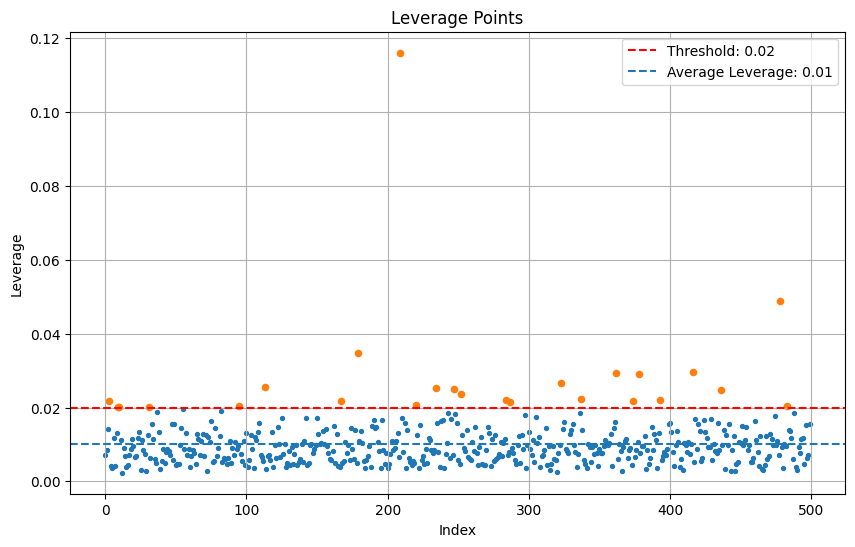

In [ ]:
# Plotting leverange points
plt.figure(figsize=(10, 6))
plt.scatter(summary["index"], summary["leverage"], s=8)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.axhline(avg_lev, linestyle='--', label=f'Average Leverage: {avg_lev:.2f}')
hi_idx = summary.index[summary["leverage"] > threshold].tolist()

if len(hi_idx) > 0:
  plt.scatter(hi_idx, summary.loc[hi_idx, "leverage"], s=20)

plt.xlabel("Index")
plt.ylabel("Leverage")
plt.title("Leverage Points")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Leverage points
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Generate synthetic data
np.random.seed(0)

# Normal house
house_size = np.random.normal(2000, 400, 100)
house_price = 100 + 0.5 * house_size + np.random.normal(0, 20000, 100)

# Add few mansions
house_size = np.append(house_size, [5000, 6000, 7000])
house_price = np.append(house_price, [450000, 550000, 800000])

# Fit a linear regression model
X = sm.add_constant(house_size)
model = sm.OLS(house_price, X).fit()

In [ ]:
# Printing model parameter
print("Model with mansions:")
print(f"Intercept: {model.params[0]:.2f}")
print(f"Slope: {model.params[1]:.2f}")

Model with mansions:
Intercept: -225040.03
Slope: 114.59


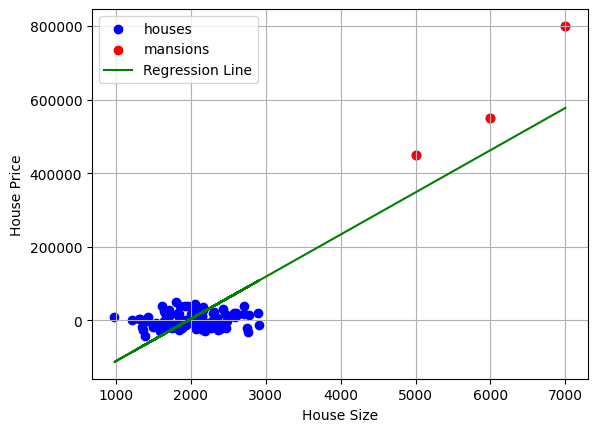

In [ ]:
# Plot the data
plt.scatter(house_size, house_price, label="houses", color='blue')
plt.scatter(house_size[-3:], house_price[-3:], label="mansions", color='red')
plt.plot(house_size, model.params[0] + model.params[1]*house_size, color='green', label="Regression Line")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Get the leverage points
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

# Threshold
n = len(house_size)
p = X.shape[1]
avg_lev = p/n
threshold = 2*avg_lev
print(threshold)

0.038834951456310676


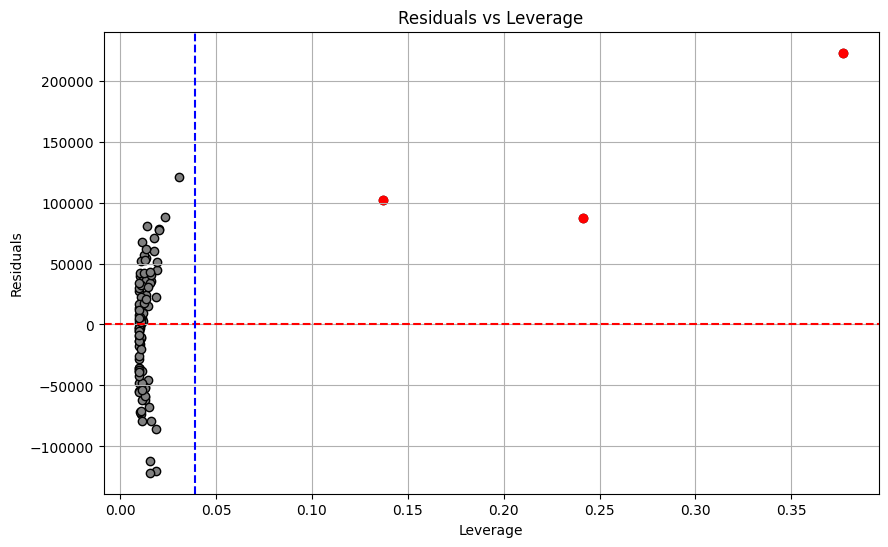

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(leverage, residuals, edgecolors='k', facecolor='gray')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(threshold, color='blue', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.title("Residuals vs Leverage")
plt.grid(True)

high_leverage_points = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points], color='red', label="High Leverage Points")

plt.show()

In [ ]:
print(f"High leverange points (index): {high_leverage_points}")
print(f"Leverage values: {leverage[high_leverage_points]}")

High leverange points (index): [100 101 102]
Leverage values: [0.13694378 0.24146323 0.37708716]


##Exercise 1:

Use the Boston Housing dataset, analyze it, and identify its leverage points. This dataset is available in the Kaggle library.

In [ ]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.width', 140)
pd.set_option('display.max_columns', 200)

In [8]:
# Cargamos nuestro dataset (Boston Housing)
path = Path("/content/housing.csv")
if not path.exists():
  raise FileNotFoundError(f"No se pudo encontrar el archivo en: {path}")

df_raw = pd.read_csv(path)
print(f"Archivo cargado exitosamente con {df_raw.shape[0]} filas y {df_raw.shape[1]} columnas.")
df_raw.head()

Archivo cargado exitosamente con 489 filas y 4 columnas.


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [9]:
# Realizamos las matrices de covarianza y correlación
X_df = df_raw.drop(columns=["MEDV"])
y = df_raw["MEDV"].to_numpy().reshape(-1, 1)

# Calculamos nuestras matrices
mat_cov = X_df.cov()
mat_corr = X_df.corr()

print("Covariance Matrix:\n", mat_cov.round(3), "\n")
print("Correlation Matrix:\n", mat_corr.round(3))

Covariance Matrix:
             RM   LSTAT  PTRATIO
RM       0.414  -2.790   -0.414
LSTAT   -2.790  50.155    5.389
PTRATIO -0.414   5.389    4.457 

Correlation Matrix:
             RM  LSTAT  PTRATIO
RM       1.000 -0.612   -0.305
LSTAT   -0.612  1.000    0.360
PTRATIO -0.305  0.360    1.000


In [12]:
# Hat-Matrix
n = X_df.shape[0]
X = np.column_stack([np.ones((n, 1)), X_df.to_numpy()])
p = X.shape[1]

XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
H = X @ XtX_inv @ X.T

# Leverage
h_lev = np.diag(H)
print(f"Primeros 5 valores de Leverage: {h_lev[:5]}")

Primeros 5 valores de Leverage: [0.00783192 0.0026977  0.00698651 0.00742225 0.00704811]


In [13]:
# Calculamos los Leverage Points
# 1. Definimos los thresholds
thr_2pn = 2 * p / n
thr_3pn = 3 * p / n

# 2. Definimos nuestros puntos con un Leverage alto
high_lev = (h_lev > thr_3pn)
print(f"Threshold con Leverage alto: {thr_3pn:.4f}")
print(f"Puntos con Leverage alto: {int(high_lev.sum())}")

Threshold con Leverage alto: 0.0245
Puntos con Leverage alto: 16


In [31]:
# Calculamos residuos y varianza residual
y_hat = X @ XtX_inv @ X.T @ y
res = y - y_hat
rss = float(res.T @ res)
s2 = rss / (n - p)
stud_resid = (res.ravel()) / (np.sqrt(s2) * np.sqrt(1 - h_lev))

/tmp/ipython-input-1930968447.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rss = float(res.T @ res)


In [32]:
# Top 10 Leverage
order = np.argsort(h_lev)[::-1]
top10_idx = order[:10]
top10 = pd.DataFrame({
    'row_index': top10_idx,
    'leverage_hLev': h_lev[top10_idx],
    'MEDV': y[top10_idx].ravel()
}).set_index('row_index')

print("\nTop 10 Leverage Points:")
display(top10)


Top 10 Leverage Points:


,leverage_hLev,MEDV
row_index,,
353,0.075272,577500.0
355,0.046131,485100.0
253,0.037242,1024800.0
357,0.032560,289800.0
147,0.032334,306600.0
144,0.032186,247800.0
145,0.029038,289800.0
148,0.028551,373800.0
8,0.028084,346500.0


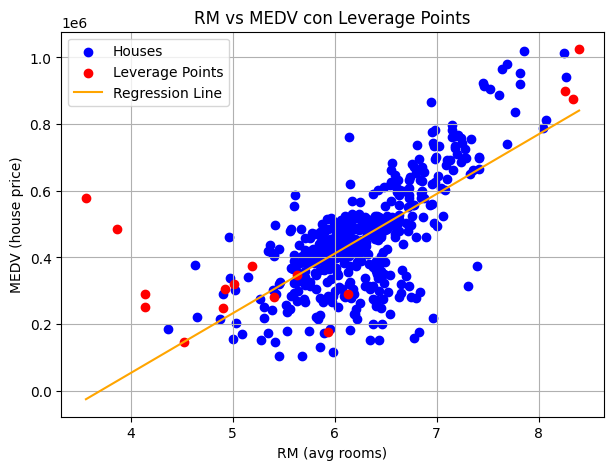

In [33]:
# Validamos que exista RM
if 'RM' in X_df.columns:
  x = X_df['RM'].to_numpy()
  y_vec = y.ravel()

  x0, x1 = np.polynomial.polynomial.polyfit(x, y_vec, 1)
  order = np.argsort(x)

  plt.figure(figsize=(7, 5))
  plt.scatter(x[~high_lev], y_vec[~high_lev], label="Houses", color='blue')
  plt.scatter(x[high_lev], y_vec[high_lev], label="Leverage Points", color='red')
  plt.plot(np.sort(x), x0 + x1 * np.sort(x), label="Regression Line", color='orange')

  plt.xlabel("RM (avg rooms)")
  plt.ylabel("MEDV (house price)")
  plt.title("RM vs MEDV con Leverage Points")
  plt.legend()
  plt.grid(True)
  plt.show()

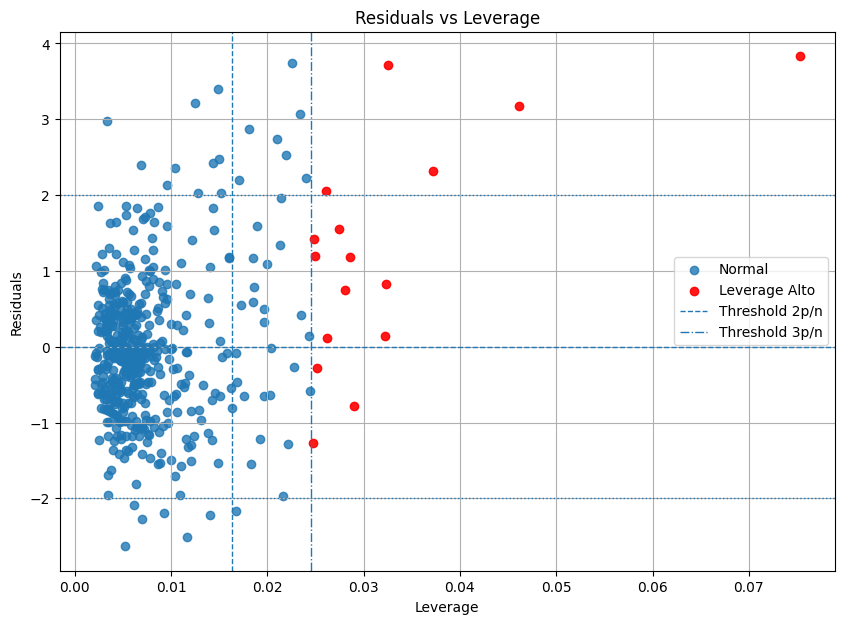

In [35]:
# Residuals vs Leverage
plt.figure(figsize=(10, 7))
plt.scatter(h_lev[~high_lev], stud_resid[~high_lev], label="Normal", alpha=0.8)
plt.scatter(h_lev[high_lev], stud_resid[high_lev], label="Leverage Alto", color='red', alpha=0.9)

plt.axhline(0, linestyle='--', linewidth=1)
plt.axhline(2, linestyle=':', linewidth=1)
plt.axhline(-2, linestyle=':', linewidth=1)
plt.axvline(thr_2pn, linestyle='--', linewidth=1, label="Threshold 2p/n")
plt.axvline(thr_3pn, linestyle='-.', linewidth=1, label="Threshold 3p/n")

plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.title("Residuals vs Leverage")
plt.legend()
plt.grid(True)
plt.show()

##Exercise 2:

Use the diamonds dataset, analyze it, and identify its leverage points. This dataset is available in the seaborn library.

In [38]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df_diamonds = sns.load_dataset("diamonds")

# Quitamos las columnas innecesarias
df_diamonds = df_diamonds[['price', 'carat']].dropna()

In [39]:
# Ajustamos la regresión simple
carat = df_diamonds['carat'].to_numpy()
price = df_diamonds['price'].to_numpy()

X_simple = sm.add_constant(carat)
modelo_simple = sm.OLS(price, X_simple).fit()

In [42]:
# Residuales y Leverage del modelo
residuals = modelo_simple.resid
influence = modelo_simple.get_influence()
leverage = influence.hat_matrix_diag

# Definimos nuestro threshold
n = len(price)
p = 2
threshold = 3 * p / n

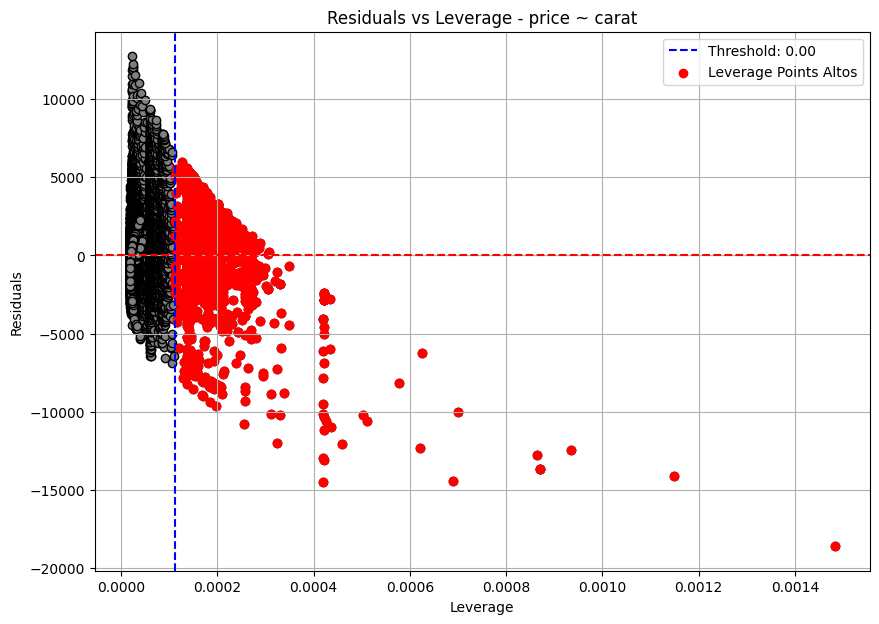

In [43]:
# Graficamos Residuals vs Leverage
plt.figure(figsize=(10, 7))
plt.scatter(leverage, residuals, edgecolors='k', facecolor='grey')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(threshold, color='blue', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.title("Residuals vs Leverage - price ~ carat")
plt.grid(True)

high_lev = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_lev], residuals[high_lev], label="Leverage Points Altos", color='red')
plt.legend()
plt.show()
